curve_fit
----------------
With method='lm', the algorithm uses the Levenberg-Marquardt algorithm through leastsq. Note that this algorithm can only deal with unconstrained problems.

Box constraints can be handled by methods ‘trf’ and ‘dogbox’. Refer to the docstring of least_squares for more information. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

leastsq - this i try here
------------
“leastsq” is a wrapper around MINPACK’s lmdif and lmder algorithms.

cov_x is a Jacobian approximation to the Hessian of the least squares objective function. This approximation assumes that the objective function is based on the difference between some observed target data (ydata) and a (non-linear) function of the parameters f(xdata, params)
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.leastsq.html

http://iminuit.readthedocs.io/en/latest/

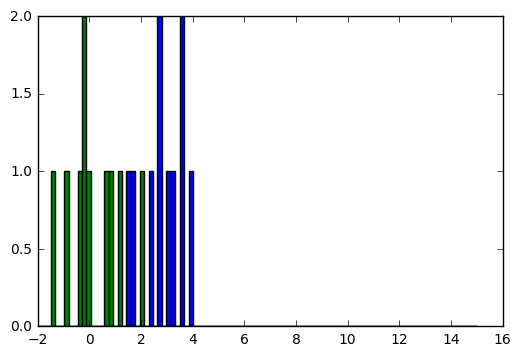

In [371]:
%matplotlib inline
import numpy as np
from scipy import optimize
import random
import matplotlib.pyplot as plt

# These are the true parameters
p0 = 1.0
p1 = 1.0
sigma=1.0
fasigma=sigma *1.0  #  points are dispersed more than 1sigma
totalpoints=10
#pd.Series(100)  #pandas
li=np.random.random(totalpoints)*3+1
ga=np.random.normal(0.,  fasigma , totalpoints)
plt.hist( li,  bins = np.linspace(-2.0, 15, 100))
plt.hist( ga,  bins = np.linspace(-2.0, 15, 100))
plt.show()
#hist=np.histogram(a,   bins=np.linspace(0,6,num=61) )
#hist


In [398]:
# These are initial guesses for fits:
p0=[ 5.0, 2.0 ]
pr = [
    p0[0] + random.random()*0.2-0.1,
    p0[1] + random.random()*0.2-0.1, 
]
def f(x,p):
    return p[0]*x+p[1]
%matplotlib inline
import matplotlib.pyplot as plt
xvals = np.linspace(0., 1, totalpoints )
yvals = f(xvals, p0 )
yrand=[ y+g for y,g in zip(yvals,ga[0:len(xvals)]) ]
dyrand=[ sigma for x in xvals ]
#yrand
#plt.errorbar(xvals, yvals, fmt='s', yerr=sigma )
#plt.plot(xvals, yvals, '.' )
#plt.errorbar(xvals, yrand, fmt='o', yerr=sigma )


In [70]:
print('real     values',p0)# Generate data with a bit of randomness
print('starting values',pr)# Generate data with a bit of randomness
#errfunc = lambda p, x, y, dy: ((f(x,p) - y)**2)/dy/dy
errfunc = lambda p, x, y, dy: ((f(x,p) - y))/dy
##                               (y-m)**2 / dy**2
pfit, pcov, infodict, errmsg, success = \
        optimize.leastsq(errfunc, pr, args=(xvals, yrand, dyrand), \
                          full_output=1, epsfcn=0.0001)
print('fitted values =',pfit)
print(pcov)
if (len(yrand) > len(pfit)) and pcov is not None:
    xi2=(errfunc(pfit, xvals, yrand, dyrand)**2).sum()
    s_sq = xi2/(len(yrand)-len(pfit))
    if (s_sq>1.0):
        print('... i multiply by normalized xi2',s_sq)
        pcov = pcov * xi2      
    else:
        print('... i DONT multiply by normalized xi2',s_sq)
        #pcov = pcov * s_sq        

    print( '       Xi2=', xi2 , ' np=', (len(yrand)-len(pfit)), "     Xi2/np=", s_sq)
    from scipy.stats import chi2
    df = (len(yrand)-len(pfit))
    mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
#    x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
    #ax.plot(x, chi2.pdf(x, df), 'r-', lw=1, alpha=0.6, label='chi2 pdf')
    print( 'Xi2 1sig =( ', chi2.ppf( 0.33, df),'...', chi2.ppf( 0.66, df) ,')' )
    print( 'Xi2 2sig=( ', chi2.ppf( 0.05, df),'...', chi2.ppf( 0.95, df) ,')' )
    print( 'Xi2 3sig=( ', chi2.ppf( 0.01, df),'...', chi2.ppf( 0.99, df) ,')' )
else:
    pcov = np.inf
error=[]
for i in range(len(pfit)):
    try:
        error.append(np.absolute(pcov[i][i])**0.5)
    except:
        error.append( 0.00 )
print('delta  values=',error)
print(pcov)

#plt.plot(xvals, yvals,'k. ')
plt.errorbar(xvals, yrand, fmt='r. ', yerr=dyrand)
plt.plot(xvals, f(xvals,pfit) ,"r")
plt.plot(xvals, f(xvals,p0)   ,"g" )
#plt.plot(xdata, ydata, 'o', mfc='None') 
plt.tight_layout()

plt.show()


real     values [5.0, 2.0]
starting values [5.0258166045800206, 2.0541290259989498]


TypeError: f() missing 1 required positional argument: 'p1'

In [400]:
print('ok')

ok


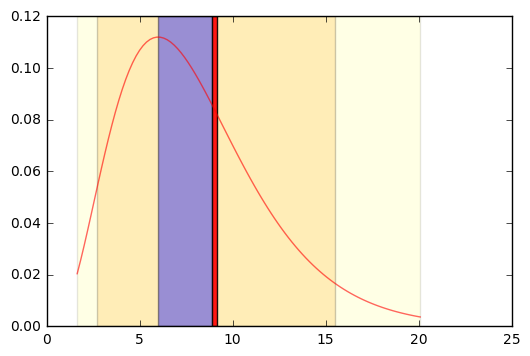

In [401]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(1, 1)
df = (len(yrand)-len(pfit))
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
plt.plot(x, chi2.pdf(x, df), 'r-', lw=1, alpha=0.6, label='chi2 pdf')
(lll,hhh)=( chi2.ppf( 0.01, df), chi2.ppf( 0.99, df) )
plt.axvspan( lll,hhh, ymin=0,ymax=1, facecolor='yellow', alpha=0.1)
(ll,hh)=( chi2.ppf( 0.05, df), chi2.ppf( 0.95, df) )
plt.axvspan( ll,hh, ymin=0,ymax=1, facecolor='orange', alpha=0.2)
(l,h)=( chi2.ppf( 0.35, df), chi2.ppf( 0.65, df) )
plt.axvspan( l,h, ymin=0,ymax=1, facecolor='blue', alpha=0.4)
(l,h)=( xi2-(hh-ll)/100 ,xi2+(hh-ll)/100)
plt.axvspan( l,h, ymin=0,ymax=1, facecolor='red', alpha=0.9)
plt.show()